In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grocery-sales-dataset/countries.csv
/kaggle/input/grocery-sales-dataset/products.csv
/kaggle/input/grocery-sales-dataset/categories.csv
/kaggle/input/grocery-sales-dataset/cities.csv
/kaggle/input/grocery-sales-dataset/employees.csv
/kaggle/input/grocery-sales-dataset/sales.csv
/kaggle/input/grocery-sales-dataset/customers.csv


Use Cases

1. Monthly Sales Performance

    Objective: Analyze sales performance within the four-month period to identify trends and patterns.
    Tasks:
        Calculate total sales for each month.
        Compare sales performance across different product categories each month.

2. Customer Purchase Behavior

    Objective: Understand how customers interact with products during the four-month period.
    Tasks:
        Segment customers based on their purchase frequency and total spend.
        Identify repeat customers versus one-time buyers.
        Analyze average order value and basket size.

3. Salesperson Effectiveness

    Objective: Evaluate the performance of sales personnel in driving sales.
    Tasks:
        Calculate total sales attributed to each salesperson.
        Identify top-performing and underperforming sales staff.
        Analyze sales trends based on individual salesperson contributions over time.


Data Relationships

    Sales: Each sale is linked to a Product, Customer, and Employee through their respective IDs. Each sale is linked to a location via the customer.
    Customers: Associated with a City and a Country to provide geographic context.
    Employees: Manage sales and are uniquely identified by EmployeeID.
    Products: Categorized under specific Categories to organize the inventory.
    Geography: Cities belong to Countries, offering higher-level geographic segmentation.


In [2]:
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="rocket")

import warnings

import datetime
from datetime import date
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

<img src = 'https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F8067701%2Fd49f2fdeb62fe52ff5cb5bfc5f7f217c%2FScreenshot%202025-01-31%20123107.png?generation=1738348489608387&alt=media'>

<h2>Data loading/view</h2>

In [3]:
countries = pd.read_csv('/kaggle/input/grocery-sales-dataset/countries.csv')
products = pd.read_csv('/kaggle/input/grocery-sales-dataset/products.csv', parse_dates = ['ModifyDate'])
categories = pd.read_csv('/kaggle/input/grocery-sales-dataset/categories.csv')
cities = pd.read_csv('/kaggle/input/grocery-sales-dataset/cities.csv')
employees = pd.read_csv('/kaggle/input/grocery-sales-dataset/employees.csv', parse_dates = ['BirthDate', 'HireDate'])
sales = pd.read_csv('/kaggle/input/grocery-sales-dataset/sales.csv', parse_dates = ['SalesDate'])
customers = pd.read_csv('/kaggle/input/grocery-sales-dataset/customers.csv')

df_dict = {'countries' : countries, 'products' : products, 'categories' : categories,
           'cities' : cities, 'employees' : employees, 'sales' : sales, 'customers' : customers}

for key, df in df_dict.items():
    print(key.upper())
    display(df.head(3))

COUNTRIES


,CountryID,CountryName,CountryCode
0,1,Armenia,AN
1,2,Canada,FO
2,3,Belize,MK


PRODUCTS


,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,Flour - Whole Wheat,74.2988,3,Medium,2018-02-16 08:21:49.190,Durable,Unknown,0.0
1,2,Cookie Chocolate Chip With,91.2329,3,Medium,2017-02-12 11:39:10.970,Unknown,Unknown,0.0
2,3,Onions - Cippolini,9.1379,9,Medium,2018-03-15 08:11:51.560,Weak,False,111.0


CATEGORIES


,CategoryID,CategoryName
0,1,Confections
1,2,Shell fish
2,3,Cereals


CITIES


,CityID,CityName,Zipcode,CountryID
0,1,Dayton,80563,32
1,2,Buffalo,17420,32
2,3,Chicago,44751,32


EMPLOYEES


,EmployeeID,FirstName,MiddleInitial,LastName,BirthDate,Gender,CityID,HireDate
0,1,Nicole,T,Fuller,1981-03-07,F,80,2011-06-20 07:15:36.920
1,2,Christine,W,Palmer,1968-01-25,F,4,2011-04-27 04:07:56.930
2,3,Pablo,Y,Cline,1963-02-09,M,70,2012-03-30 18:55:23.270


SALES


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0


CUSTOMERS


,CustomerID,FirstName,MiddleInitial,LastName,CityID,Address
0,1,Stefanie,Y,Frye,79,97 Oak Avenue
1,2,Sandy,T,Kirby,96,52 White First Freeway
2,3,Lee,T,Zhang,55,921 White Fabien Avenue


In [4]:
for key, df in df_dict.items():
    print(key.upper())
    df.info()
    print('\n')

COUNTRIES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryID    206 non-null    int64 
 1   CountryName  206 non-null    object
 2   CountryCode  205 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.0+ KB


PRODUCTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ProductID     452 non-null    int64         
 1   ProductName   452 non-null    object        
 2   Price         452 non-null    float64       
 3   CategoryID    452 non-null    int64         
 4   Class         452 non-null    object        
 5   ModifyDate    452 non-null    datetime64[ns]
 6   Resistant     452 non-null    object        
 7   IsAllergic    452 non-null    object        
 8   VitalityDay

Let's check the presence of missing values:

In [5]:
def check_missing(df):
    def highlight_rows(x, threshold):
        if x.Nan_perc > threshold:
            return ['background-color: red']*len(x)
        else:
            return ['']*len(x)

    df_name = [x for x in globals() if globals()[x] is df][0]
    nan_Series = round(100 * df.isnull().sum() / len(df), 2)
    nan_df = pd.DataFrame({'Columns' : nan_Series.index, 'Nan_perc' : nan_Series.values})
    print(df_name.upper())
    display(nan_df.style.apply(highlight_rows, threshold = 0, axis = 1))


for key, df in df_dict.items():
    check_missing(df)
    print('\n', '--' * 15, '\n')

COUNTRIES


,Columns,Nan_perc
0,CountryID,0.000000
1,CountryName,0.000000
2,CountryCode,0.490000



 ------------------------------ 

PRODUCTS


,Columns,Nan_perc
0,ProductID,0.000000
1,ProductName,0.000000
2,Price,0.000000
3,CategoryID,0.000000
4,Class,0.000000
5,ModifyDate,0.000000
6,Resistant,0.000000
7,IsAllergic,0.000000
8,VitalityDays,0.000000



 ------------------------------ 

CATEGORIES


,Columns,Nan_perc
0,CategoryID,0.000000
1,CategoryName,0.000000



 ------------------------------ 

CITIES


,Columns,Nan_perc
0,CityID,0.000000
1,CityName,0.000000
2,Zipcode,0.000000
3,CountryID,0.000000



 ------------------------------ 

EMPLOYEES


,Columns,Nan_perc
0,EmployeeID,0.000000
1,FirstName,0.000000
2,MiddleInitial,0.000000
3,LastName,0.000000
4,BirthDate,0.000000
5,Gender,0.000000
6,CityID,0.000000
7,HireDate,0.000000



 ------------------------------ 

SALES


,Columns,Nan_perc
0,SalesID,0.000000
1,SalesPersonID,0.000000
2,CustomerID,0.000000
3,ProductID,0.000000
4,Quantity,0.000000
5,Discount,0.000000
6,TotalPrice,0.000000
7,SalesDate,1.000000
8,TransactionNumber,0.000000



 ------------------------------ 

CUSTOMERS


,Columns,Nan_perc
0,CustomerID,0.000000
1,FirstName,0.000000
2,MiddleInitial,0.990000
3,LastName,0.000000
4,CityID,0.000000
5,Address,0.000000



 ------------------------------ 



The fields with missing values are SalesDate, CountryCode and MiddleInitial: the latter may be due to people simply not having middle name, while the country code is missing only one entry that we can easily fill

In [6]:
countries[countries.isnull().apply(lambda x : any(x), axis = 1)]

,CountryID,CountryName,CountryCode
145,146,Australia,NaN


In [7]:
countries.loc[countries['CountryName'] == 'Australia', 'CountryCode'] = 'AUS'
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryID    206 non-null    int64 
 1   CountryName  206 non-null    object
 2   CountryCode  206 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.0+ KB


We also observe that the CountryID field in the city DataFrame has (wrongly) only one value and we can drop it, as well as the sales TransactionNumber since it will not be used in the analysis:

In [8]:
if 'TransactionNumber' in sales.columns:
    sales.drop('TransactionNumber', axis = 1, inplace = True)

if ('CountryID' in cities.columns) and (cities['CountryID'].nunique() == 1):
    cities.drop('CountryID', axis = 1, inplace = True)

cities.head(3)

,CityID,CityName,Zipcode
0,1,Dayton,80563
1,2,Buffalo,17420
2,3,Chicago,44751


**NOTE**: The data of the last month (May) is only partial, this has to be taken into account while studying monthly trends.

In [9]:
sales['SalesDate'].max()

Timestamp('2018-05-09 23:59:59.400000')

<h2>Monthly Sales Performance</h2>

The PriceTotal field in the sales DataFrame is meaningless, so we compute the price of each sales by first merging the sales and product data:

In [10]:
sales_full = pd.merge(sales[['ProductID', 'CustomerID', 'SalesPersonID', 'Quantity', 'Discount', 'SalesDate']], products[['ProductID', 'CategoryID', 'Price']],
                         on = 'ProductID', how = 'left')
sales_full.head()

,ProductID,CustomerID,SalesPersonID,Quantity,Discount,SalesDate,CategoryID,Price
0,381,27039,6,7,0.0,2018-02-05 07:38:25.430,1,44.2337
1,61,25011,16,7,0.0,2018-02-02 16:03:31.150,8,62.5460
2,23,94024,13,24,0.0,2018-05-03 19:31:56.880,11,79.0184
3,176,73966,8,19,0.2,2018-04-07 14:43:55.420,6,81.3167
4,310,32653,10,9,0.0,2018-02-12 15:37:03.940,9,79.9780


now we can calculate the price including the discount:

In [11]:
sales_full['SalesTotal'] = sales_full['Price'] * sales_full['Quantity'] * (1. - sales_full['Discount'])
sales_full.head()

,ProductID,CustomerID,SalesPersonID,Quantity,Discount,SalesDate,CategoryID,Price,SalesTotal
0,381,27039,6,7,0.0,2018-02-05 07:38:25.430,1,44.2337,309.63590
1,61,25011,16,7,0.0,2018-02-02 16:03:31.150,8,62.5460,437.82200
2,23,94024,13,24,0.0,2018-05-03 19:31:56.880,11,79.0184,1896.44160
3,176,73966,8,19,0.2,2018-04-07 14:43:55.420,6,81.3167,1236.01384
4,310,32653,10,9,0.0,2018-02-12 15:37:03.940,9,79.9780,719.80200


We group by year (technically not necessary with one year only, but we do it anyway for the sake of generalization) and by month, summing the sales total price:

In [12]:
sales_total_monthly = sales_full.groupby([sales_full['SalesDate'].dt.year.rename('Year'), sales_full['SalesDate'].dt.month.rename('Month')]).agg({'SalesTotal' : 'sum'})
sales_total_monthly.head()

SalesTotal
Year   Month              
2018.0 1.0    1.030736e+09
       2.0    9.292042e+08
       3.0    1.032201e+09
       4.0    9.972685e+08
       5.0    2.998324e+08

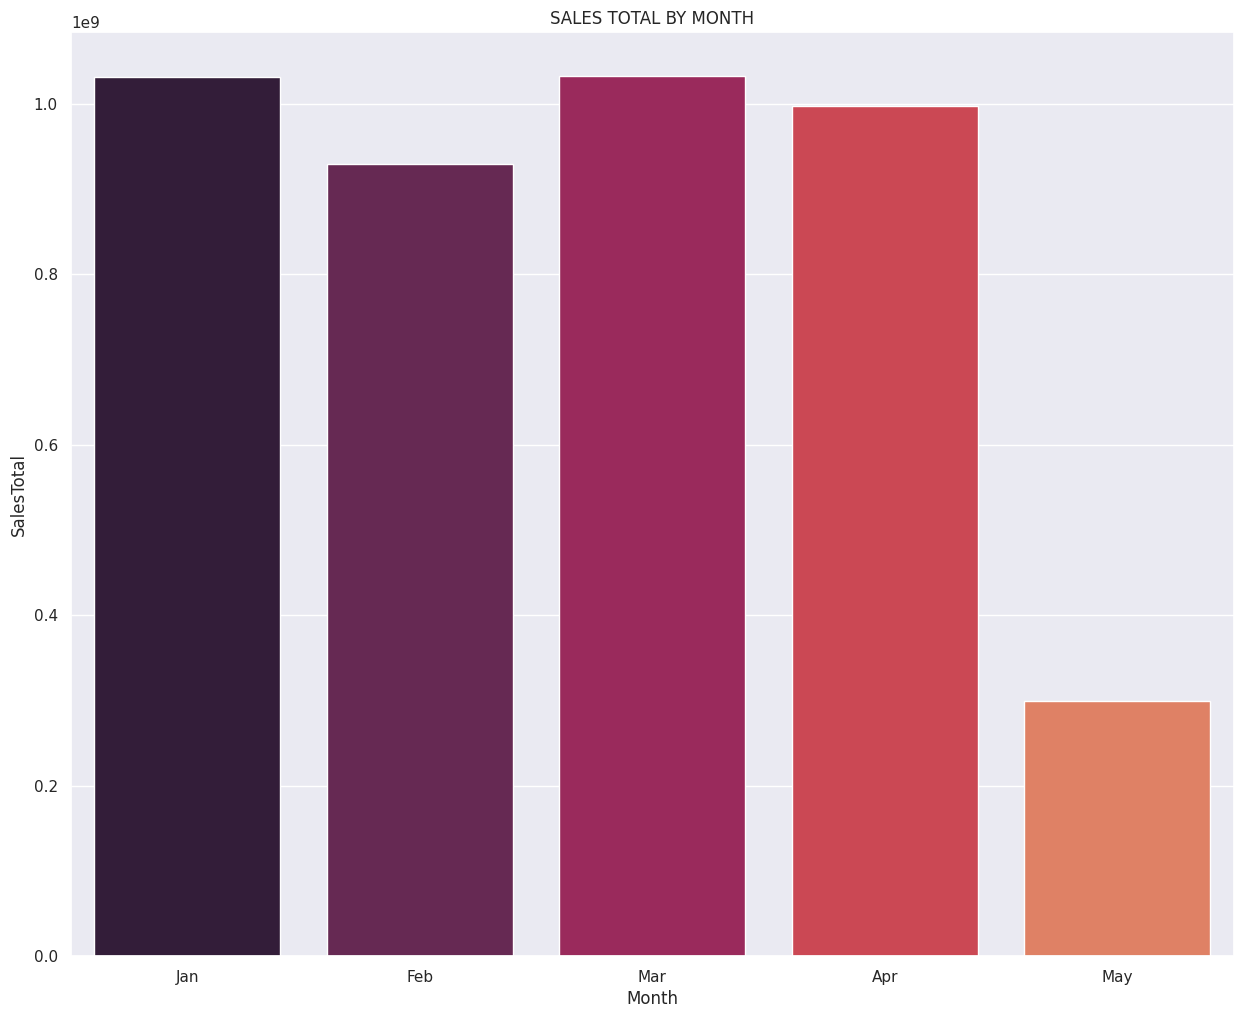

In [13]:
_, ax = plt.subplots(figsize = (15, 12))
sns.barplot(x = sales_total_monthly.index.get_level_values(1), y = sales_total_monthly.loc[:, 'SalesTotal'], ax = ax)
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.title('Sales total by month'.upper())
plt.show()

To study the sales trend for each category we pivot the sales data on the CategoryID field, then make the same operations as above:

In [14]:
categories.head(1)

,CategoryID,CategoryName
0,1,Confections


In [15]:
sales_category = pd.merge(sales_full, categories, how = 'left', on = 'CategoryID')
sales_category = pd.pivot_table(sales_category, values = 'SalesTotal', columns = 'CategoryName', index = 'SalesDate', fill_value = 0)
sales_cat_monthly = sales_category.groupby([sales_category.index.year.rename('Year'), sales_category.index.month.rename('Month')]).agg('sum')
#We reset the month index to make plotting easier
sales_cat_monthly = sales_cat_monthly.reset_index(level = 1)
sales_cat_monthly.head(20)

CategoryName,Month,Beverages,Cereals,Confections,Dairy,Grain,Meat,Poultry,Produce,Seafood,Shell fish,Snails
Year,,,,,,,,,,,,
2018,1,8.702529e+07,1.011682e+08,1.327642e+08,8.402495e+07,7.736691e+07,1.170887e+08,1.047421e+08,8.741805e+07,7.864204e+07,7.126848e+07,8.892288e+07
2018,2,7.883233e+07,9.163084e+07,1.189722e+08,7.610822e+07,6.975316e+07,1.053218e+08,9.423461e+07,7.896514e+07,7.104729e+07,6.411128e+07,7.996120e+07
2018,3,8.738281e+07,1.021289e+08,1.325288e+08,8.436452e+07,7.698383e+07,1.174793e+08,1.047060e+08,8.789023e+07,7.849319e+07,7.162672e+07,8.829294e+07
2018,4,8.415074e+07,9.826486e+07,1.280237e+08,8.176407e+07,7.411741e+07,1.136282e+08,1.014326e+08,8.473260e+07,7.612740e+07,6.907181e+07,8.567857e+07
2018,5,2.540865e+07,2.978970e+07,3.885472e+07,2.441010e+07,2.235433e+07,3.425729e+07,3.055884e+07,2.539713e+07,2.281148e+07,2.053261e+07,2.538928e+07


In [16]:
fig = px.line(sales_cat_monthly, x  = 'Month', y = sales_cat_monthly.columns)
fig.show()

<h2>Customer Segmentation</h2>

We don't have enough data for a demographic or psychographic segmentation, therefore we aim to a behavioral analysis, and specifically an RFM segmentation computing for each customer:
<ul>
    <li>Recency: the time elapsed from the last sale.</li>
    <li>Frequency: the number of sales per time unit.</li>
    <li>Monetary: the amount of money spent on purchases.</li>
</ul>

In [17]:
TODAY = pd.Timestamp.today()
TIMESPAN = (sales_full['SalesDate'].max() - sales_full['SalesDate'].min()).days

customer_data = sales_full.groupby('CustomerID').agg(Frequency = ('SalesTotal' , lambda x : len(x) / TIMESPAN),
Monetary = ('SalesTotal' ,'sum'),
Recency = ('SalesDate', lambda x : (TODAY - x.max()).days))                                                        
customer_data.head()

,Frequency,Monetary,Recency
CustomerID,,,
1,0.507812,3263.56073,2497
2,0.500000,3397.89219,2498
3,0.554688,3327.79072,2494
4,0.539062,3122.56073,2495
5,0.460938,2650.34531,2494


To compute the RFM score we divide Recency, Frequency and Monetary in 5 n-tiles and sum their values:

In [18]:
customer_data['RFM'] = pd.cut(customer_data['Frequency'], bins = 5, labels = [1, 2, 3, 4, 5]).astype('int') + pd.cut(customer_data['Monetary'], bins = 5, labels = [1, 2, 3, 4, 5]).astype('int') + pd.cut(customer_data['Recency'], bins = 5, labels = [5, 4, 3, 2, 1]).astype('int')
customer_data.head()

,Frequency,Monetary,Recency,RFM
CustomerID,,,,
1,0.507812,3263.56073,2497,9
2,0.500000,3397.89219,2498,8
3,0.554688,3327.79072,2494,9
4,0.539062,3122.56073,2495,9
5,0.460938,2650.34531,2494,8


In [19]:
customers = pd.merge(customers, customer_data, on = 'CustomerID', how = 'left')
customers.head()

,CustomerID,FirstName,MiddleInitial,LastName,CityID,Address,Frequency,Monetary,Recency,RFM
0,1,Stefanie,Y,Frye,79,97 Oak Avenue,0.507812,3263.56073,2497,9
1,2,Sandy,T,Kirby,96,52 White First Freeway,0.500000,3397.89219,2498,8
2,3,Lee,T,Zhang,55,921 White Fabien Avenue,0.554688,3327.79072,2494,9
3,4,Regina,S,Avery,40,75 Old Avenue,0.539062,3122.56073,2495,9
4,5,Daniel,S,Mccann,2,283 South Green Hague Avenue,0.460938,2650.34531,2494,8


<h2>Salesperson effectiveness</h2>

To find the top best (and worst) salespersons we group the sales date by their ID, summing the sales prices and sorting their values:

In [20]:
sales_performance_total = sales_full.groupby(['SalesPersonID']).agg(SalesPerson_Total = ('SalesTotal', 'sum'))
sales_performance_total.sort_values(by = 'SalesPerson_Total', ascending = False).head(10)

,SalesPerson_Total
SalesPersonID,
21,1.900427e+08
20,1.894131e+08
13,1.893129e+08
5,1.892226e+08
4,1.891360e+08
14,1.890622e+08
8,1.888626e+08
7,1.887950e+08
6,1.887848e+08


In [21]:
sales_performance_total.sort_values(by = 'SalesPerson_Total', ascending = True).head(10)

,SalesPerson_Total
SalesPersonID,
17,1.863204e+08
10,1.872644e+08
3,1.875294e+08
11,1.875524e+08
1,1.876495e+08
16,1.877798e+08
2,1.878417e+08
9,1.878541e+08
15,1.879319e+08


In [22]:
best_performers = [21, 20, 13, 5, 4, 14, 8, 7, 6, 22]
best_peformers_names = '\n'.join(list((employees[employees['EmployeeID'].isin(best_performers)]['FirstName'] + ' ' + employees[employees['EmployeeID'].isin(best_performers)]['LastName']).values))

worst_performers = [17, 10, 3, 11, 1, 16, 2, 9, 15, 23]
worst_peformers_names = '\n'.join(list((employees[employees['EmployeeID'].isin(worst_performers)]['FirstName'] + ' ' + employees[employees['EmployeeID'].isin(worst_performers)]['LastName']).values))

print('BEST PERFORMING EMPLOYEES:\n\n', best_peformers_names)
print('\n')
print('WORST PERFORMING EMPLOYEES:\n\n', worst_peformers_names)

BEST PERFORMING EMPLOYEES:

 Darnell Nielsen
Desiree Stuart
Holly Collins
Chadwick Cook
Julie Dyer
Katina Marks
Wendi Buckley
Shelby Riddle
Devon Brewer
Tonia Mc Millan


WORST PERFORMING EMPLOYEES:

 Nicole Fuller
Christine Palmer
Pablo Cline
Daphne King
Jean Vang
Sonya Dickson
Kari Finley
Chadwick Walton
Seth Franco
Janet Flowers


<h3>Monthly sales for top 3 salespersons</h3>

We first compute the sales total for each month and for each salesperson

In [23]:
salespersons = sales_full.copy()
salespersons['SalesDate'] = salespersons['SalesDate'].dt.month
salespersons = salespersons.groupby(['SalesPersonID', 'SalesDate']).agg({'SalesTotal' : 'sum'})
salespersons.head()

SalesTotal
SalesPersonID SalesDate              
1             1.0        4.440425e+07
              2.0        4.037888e+07
              3.0        4.494872e+07
              4.0        4.290905e+07
              5.0        1.312080e+07

and then select only the first three IDs of the best_performes list:

In [24]:
topsalespersons = salespersons.iloc[salespersons.index.get_level_values(0).isin(best_performers[:3])]
#We still reset the index to create the month column 
topsalespersons_wide = topsalespersons.reset_index()
topsalespersons_wide.head()

,SalesPersonID,SalesDate,SalesTotal
0,13,1.0,4.511062e+07
1,13,2.0,4.046347e+07
2,13,3.0,4.514653e+07
3,13,4.0,4.358408e+07
4,13,5.0,1.313308e+07


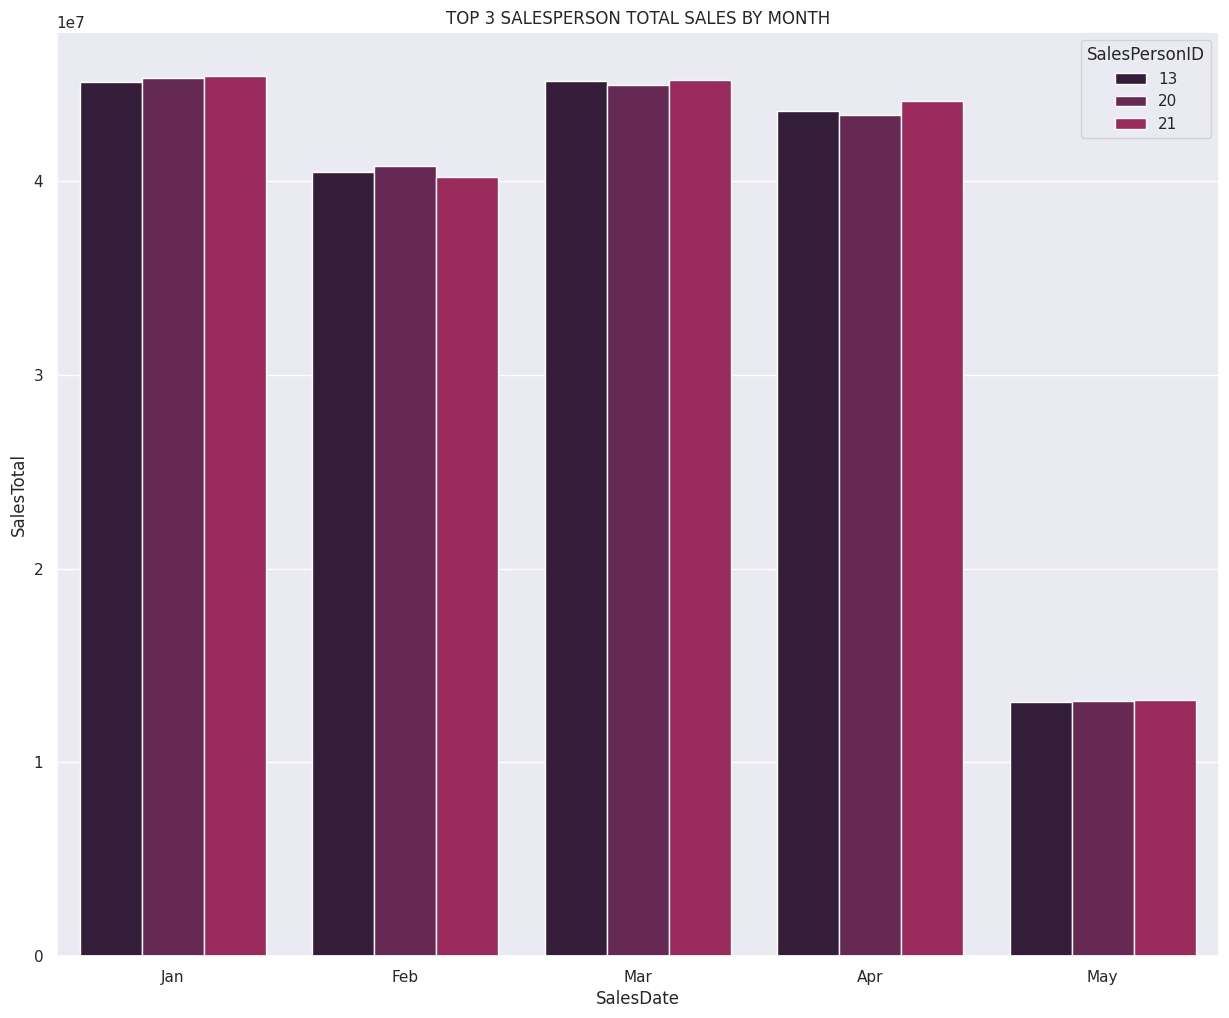

In [25]:
warnings.simplefilter('ignore')
_, ax = plt.subplots(figsize = (15, 12))
sns.barplot(x = topsalespersons_wide['SalesDate'], y = topsalespersons_wide['SalesTotal'], hue = topsalespersons_wide['SalesPersonID'] , ax = ax)
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.title('Top 3 Salesperson total sales by month'.upper())
plt.show()